In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import matplotlib as mt
from matplotlib import pylab
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec
from scipy.cluster.hierarchy import dendrogram,linkage
import networkx as nx
import numpy as np
import pandas as pd
import itertools
import tempfile as tmp
import simplejson as json
from pprint import pprint
import os

In [3]:
path='benchmarks/Human_Rhinovirus_Serotype_16_Inhibitors/'
for file in os.listdir(path):
    if '.json' in file:
        json_file=json.loads(open(path+file).read())
        table=pd.DataFrame(json_file.get('points'))
        table=table.append(table)
table=table.drop_duplicates(['name','x','y','z'],keep='first')
table=table.reset_index(drop=True)

In [4]:
table

,enabled,hasvec,maxsize,minsize,name,radius,selected,svector,vector_on,x,y,z
0,True,True,,,Aromatic,1.1,False,"{'x': -0.055787151254673255, 'y': 0.2870000130...",0,44.106,-0.529,122.782
1,True,True,,,Aromatic,1.1,False,"{'x': -0.5537508765739676, 'y': -0.82096943588...",0,37.817,4.357,123.822
2,True,True,,,Aromatic,1.1,False,"{'x': 0.2978445664300422, 'y': 0.5845528750832...",0,46.673,-3.458,121.653
3,True,False,,,Hydrophobic,1.0,False,"{'x': 1, 'y': 0, 'z': 0}",0,44.106,-0.529,122.782
4,True,False,,,Hydrophobic,1.0,False,"{'x': 1, 'y': 0, 'z': 0}",0,37.817,4.357,123.822
5,True,False,,,Hydrophobic,1.0,False,"{'x': 1, 'y': 0, 'z': 0}",0,46.673,-3.458,121.653
6,True,False,,,Hydrophobic,1.0,False,"{'x': 1, 'y': 0, 'z': 0}",0,35.615,5.859,123.898
7,True,False,,,Hydrophobic,1.0,False,"{'x': 1, 'y': 0, 'z': 0}",0,45.248,2.003,123.511
8,True,False,,,Hydrophobic,1.0,False,"{'x': 1, 'y': 0, 'z': 0}",0,41.158,-1.111,122.762
9,True,False,,,Hydrophobic,1.0,False,"{'x': 1, 'y': 0, 'z': 0}",0,49.441,-4.355,122.091


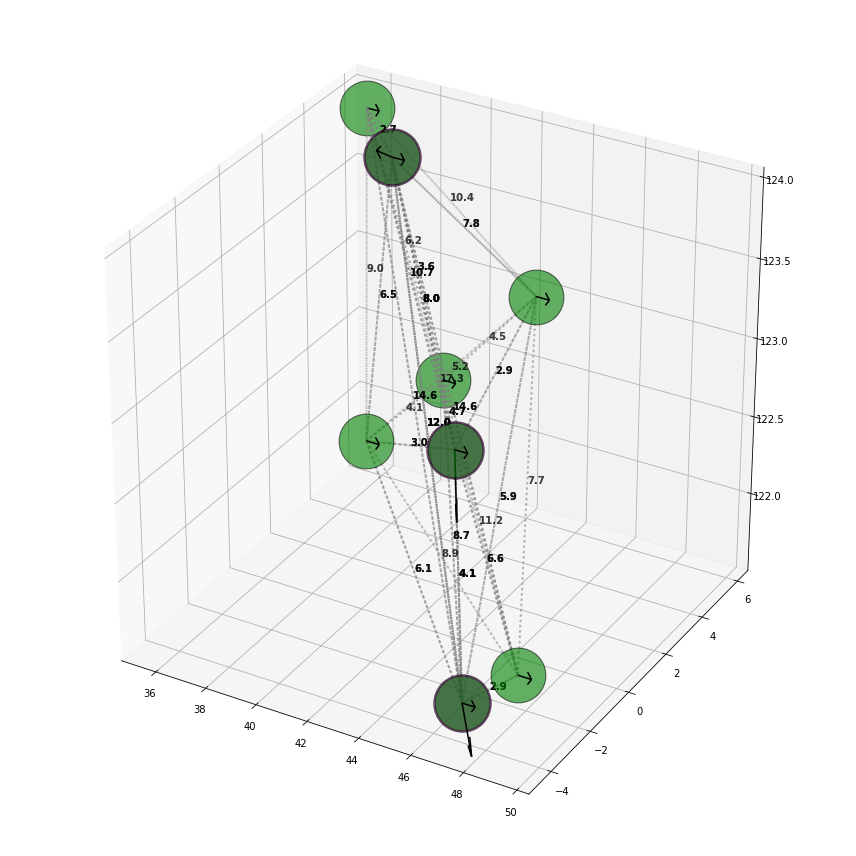

In [5]:
fig = plt.figure(figsize=(12,12))
ax  = fig.add_subplot(111, projection='3d')

descriptors={'Hydrophobic':        'green',\
             'HydrogenAcceptor':    'yellow',\
             'HydrogenDonor':       'white',\
             'Aromatic':            'purple',\
             'NegativeIon':         'blue',\
             'PositiveIon':         'red',\
             'InclusionSphere':     'cyan',\
             'Other':               'orange',\
             'PhenylalanineAnalog': 'black',\
             'LeuValAnalog':        'gray' \
             }

enabled=table.groupby(['enabled']).get_group(True)
disabled=table.groupby(['enabled']).get_group(False)


for i in enabled.index:
    ax.scatter(enabled.loc[i,'x'], enabled.loc[i,'y'],enabled.loc[i,'z'],
               facecolors=descriptors[enabled.loc[i,'name']],
               edgecolors='k',
               s=table.loc[i,'radius']*3000,
               alpha=0.6)
    #ax.text(enabled.loc[i,'x'], enabled.loc[i,'y'],enabled.loc[i,'z'],str(i),alpha=1,color='r',fontsize=20,fontweight='bold')
    
    vec=enabled.loc[i,'svector']
    if vec['x'] or vec ['y'] or vec['z'] != 0:
        ax.quiver3D(enabled.loc[i,'x'], enabled.loc[i,'y'],enabled.loc[i,'z'],vec['x'], vec['y'], vec['z'],
        color='k',length=0.5,normalize = True)

for a, b in itertools.product(enabled[['x','y','z']].values, enabled[['x','y','z']].values):
    x = np.linspace(a[0], b[0], 100)
    y = np.linspace(a[1], b[1], 100)
    z = np.linspace(a[2], b[2], 100)
    d = np.sqrt(sum([(a[i]-b[i])**2 for i in (0, 1, 2)]) )
    s = "%.1f" % d
    m = [(a[i]+b[i])/2. for i in (0, 1, 2)]
    
    ax.plot(x, y, z,':',c='gray',linewidth=2,alpha=0.4)

    if d>0:
        ax.text(m[0], m[1], m[2], s,alpha=0.5,fontsize=10,fontweight='bold')
        
plt.tight_layout()
plt.show()

/home/angel/miniconda3/envs/Cheminformatics/lib/python3.6/site-packages/ipykernel_launcher.py:20: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
/home/angel/miniconda3/envs/Cheminformatics/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


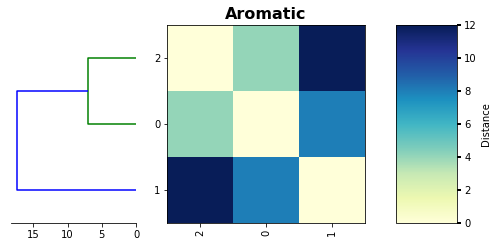

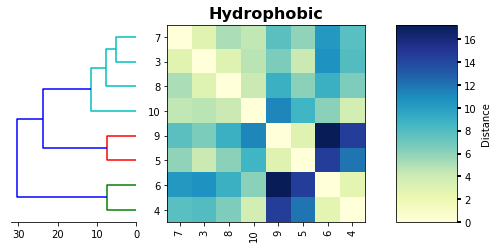

In [6]:
names=list(set(enabled['name']))
for name in names:
    
    descriptor=enabled.groupby(['name']).get_group(name)
    
    size=len(descriptor.index)
    if size > 1:
        figure= plt.figure(figsize=(8,8))
        gs1 = gridspec.GridSpec(2,7)
        gs1.update(wspace=0.05)
        
        hmap=np.empty(shape=(size,size))
        for index,i in enumerate(descriptor.index):
            for jndex,j in enumerate(descriptor.index):
                coord_A=np.array((descriptor.loc[i,'x'],descriptor.loc[i,'y'],descriptor.loc[i,'z']))
                coord_B=np.array((descriptor.loc[j,'x'],descriptor.loc[j,'y'],descriptor.loc[j,'z']))
                dist = np.linalg.norm(coord_A-coord_B)        
                hmap[index,jndex]=dist      

        linked = linkage(hmap, 'complete','euclidean')
        labelList = [i for i in descriptor.index]

        ax1 = plt.subplot(gs1[-1, :2])

        o=dendrogram(linked,  
                    orientation='left',
                    labels=labelList,
                    distance_sort='descending',
                    show_leaf_counts=True,
                    no_labels=True)

        ax1.spines['left'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.spines['right'].set_visible(False)

        new_data=list(reversed(o['ivl']))
        size=len(new_data)
        hmap_2=np.empty(shape=(size,size))
        for index,i in enumerate(new_data):
            for jndex,j in enumerate(new_data):
                coord_A=np.array((descriptor.loc[i,'x'],descriptor.loc[i,'y'],descriptor.loc[i,'z']))
                coord_B=np.array((descriptor.loc[j,'x'],descriptor.loc[j,'y'],descriptor.loc[j,'z']))
                dist = np.linalg.norm(coord_A-coord_B)        
                hmap_2[index,jndex]=dist 

        ax = plt.subplot(gs1[-1,2:6])
        ax.set_title(name,fontsize=16,fontweight='bold')

        ls=ax.imshow (hmap_2,cmap='YlGnBu', interpolation='nearest')
        ax.set_xticks (np.arange(len(new_data)))
        ax.set_yticks (np.arange(len(new_data)))
        ax.set_xticklabels(new_data,rotation=90)
        ax.set_yticklabels(new_data)

        ax2 = plt.subplot(gs1[-1,6:7])
        m=plt.colorbar(ls,cax=ax2,shrink=0.75,orientation='vertical',spacing='uniform',pad=0.01)
        m.set_label ('Distance')

        plt.tick_params ('both',width=2,labelsize=10)
        plt.tight_layout()
        plt.show() 
    else:
        print ('--- Unique descriptor found ---\n')
        print (descriptor)

Como idea general, descriptores con distancias mayores a 3 A son considerados como diferentes. Mientras que descriptores con distancias menores a 2 A son agrupados.

In [7]:
for index,i in enumerate(new_data):
    for jndex,j in enumerate(new_data):
        coord_A=np.array((descriptor.loc[i,'x'],descriptor.loc[i,'y'],descriptor.loc[i,'z']))
        coord_B=np.array((descriptor.loc[j,'x'],descriptor.loc[j,'y'],descriptor.loc[j,'z']))
        dist = np.linalg.norm(coord_A-coord_B)
        if dist <= 3 and i!=j:
            print (i,j,dist)

7 3 2.871694447534415
3 7 2.871694447534415
9 5 2.9424950297324197
5 9 2.9424950297324197
6 4 2.6665678315017582
4 6 2.6665678315017582


Para descriptores en el mismo grupo, es posible encontrar distancias mayores a 3 A (#8 vs #10 = 4.079). Sin embargo, al estar dentro del mismo grupo podriamos considerar que estos descriptores están dispersos. El análisis de las distancias minimas podría ayudarnos a definir el centro y el radio para cada descriptor.

In [8]:
for index,i in enumerate(new_data):
    for jndex,j in enumerate(new_data):
        coord_A=np.array((descriptor.loc[i,'x'],descriptor.loc[i,'y'],descriptor.loc[i,'z']))
        coord_B=np.array((descriptor.loc[j,'x'],descriptor.loc[j,'y'],descriptor.loc[j,'z']))
        dist = np.linalg.norm(coord_A-coord_B)
        if dist >= 3 and i!=j:
            print (i,j,dist)

7 8 5.194814433644378
7 10 4.499142807246727
7 9 7.747374587561908
7 5 5.941827160057753
7 6 10.383313247706626
7 4 7.80114081400919
3 8 3.0049672211190592
3 10 4.720331450226773
3 9 6.601362132166362
3 5 4.055018002426127
3 6 10.684057328562028
3 4 8.031570020861427
8 7 5.194814433644378
8 3 3.0049672211190592
8 10 4.07903481230548
8 9 8.920866886127158
8 5 6.095368323571595
8 6 8.977541144433703
8 4 6.494990762118142
10 7 4.499142807246727
10 3 4.720331450226773
10 8 4.07903481230548
10 9 11.240071218635583
10 5 8.676209886811176
10 6 6.171825985881327
10 4 3.5930850254342763
9 7 7.747374587561908
9 3 6.601362132166362
9 8 8.920866886127158
9 10 11.240071218635583
9 6 17.284366375427247
9 4 14.629172259564111
5 7 5.941827160057753
5 3 4.055018002426127
5 8 6.095368323571595
5 10 8.676209886811176
5 6 14.633040627292742
5 4 12.008643636980823
6 7 10.383313247706626
6 3 10.684057328562028
6 8 8.977541144433703
6 10 6.171825985881327
6 9 17.284366375427247
6 5 14.633040627292742
4 7 7.8